# MLP on MNIST dataset in Keras

## Steps to follow in this assignment:-
1. Load libraries and MNIST data
2. Normalize the data
3. Convert class label values to one-hot encoded values
4. Implementing Softmax classifier with 2 , 3 , 5 hidden layers
5. Implementing model with and without dropout and normalization
6. Compiling the model 
7. Plotting Categorical Crossentropy Loss VS Epochs plot
8. Plotting Violin plots to check weights distribution





# 1. Loading libraries

In [0]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


# 2. Loading MNIST data

In [0]:
# Loading MNIST Train and Test data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# Printing to see how many data points are there for train and test and to see each image size

print("Number of Train data points :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of Test data points :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of Train data points : 60000 and each image is of shape (28, 28)
Number of Test data points : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 3 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 
# We are reshaping the train and test data points to 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

In [0]:
# after converting the input images from 3d to 2d vectors , printing the shapes of train and test data

print("Number of Train data points after reshape :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of Test data points after reshape :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of Train data points after reshape : 60000 and each image is of shape (784)
Number of Test data points after reshape : 10000 and each image is of shape (784)


In [0]:
# Printing an example data point

print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

## 2.1 Normalizing the data

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets normalize the data so that all values lie between 0 to 1 instead of 0 to 255
# X => (X - Xmin)/(Xmax-Xmin) = X/255 . This is min-max type of normalization 

X_train = X_train/255
X_test = X_test/255

In [0]:
# printing example train data point after normlizing

print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

## 2.2 Converting to One-Hot encoding

In [0]:
# Here in this dataset, class labels for each image are numbers (0,1,2,3,...), so I want to convert them into one-hot encoded vectors 

print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image with class label of 5 and convert it into one-hot encoded vector of 0's and 1's - 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion is needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10)   # using np.utils we can convert numbers into one-hot encoding
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
# this function is used draw Categorical Crossentropy Loss vs No. of epochs plot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time

def plt_dynamic(x, vy, ty):
    plt.figure(figsize=(10,6))
    plt.plot(x, ty, 'b', label="Train Loss")
    plt.plot(x, vy, 'r', label="Validation/Test Loss")
    plt.title('\nCategorical Crossentropy Loss VS Epochs')
    plt.xlabel('Epochs') 
    plt.ylabel('Categorical Crossentropy Loss-Train and Test loss')
    plt.legend()
    plt.grid()
    plt.show()

# 3. Softmax Classifier with 2 hidden layers

## 3.1 Model without dropout and Batch Normalization

In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.initializers import he_normal

# some model parameters

output_dim = 10
input_dim = X_train.shape[1] # size of X 
batch_size = 128 
nb_epoch = 20    # run 20times 

### 3.2 Building the model 

In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# start building a model
# Initializing the sequential model as the layers are in sequential 

model = Sequential()   

# Adding first hidden layer
model.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))

# Adding second hidden layer
model.add(Dense(52, activation='relu', kernel_initializer=he_normal(seed=None)))

# Adding output layer 
model.add(Dense(output_dim, activation='softmax'))

# Printing model summary
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 364)               285740    
_________________________________________________________________
dense_5 (Dense)              (None, 52)                18980     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                530       
Total params: 305,250
Trainable params: 305,250
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compiling the model 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the model
# To fit the model, give input data, batch_size, number of epochs and validation/test data

history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = nb_epoch, verbose=1, validation_data = (X_test, Y_test)) 


Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.2683 - acc: 0.9218 - val_loss: 0.1305 - val_acc: 0.9612
Epoch 2/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.1036 - acc: 0.9692 - val_loss: 0.0918 - val_acc: 0.9712
Epoch 3/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.0662 - acc: 0.9802 - val_loss: 0.0769 - val_acc: 0.9753
Epoch 4/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.0477 - acc: 0.9854 - val_loss: 0.0676 - val_acc: 0.9787
Epoch 5/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.0340 - acc: 0.9898 - val_loss: 0.0809 - val_acc: 0.9751
Epoch 6/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.0266 - acc: 0.9917 - val_loss: 0.0704 - val_acc: 0.9795
Epoch 7/20
60000/60000 [==============================] - 5s 86us/step - loss: 

###  3.3 Plotting the model values

Test score: 0.09153629648885012
Test accuracy: 0.982


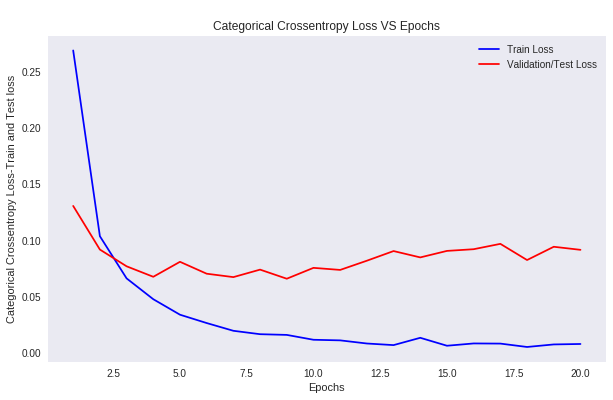

In [0]:
# Evaluating the model on test data
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

# Plotting the results
# list of epoch numbers
x = list(range(1, nb_epoch+1))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
vy = history.history['val_loss']

# Training loss
ty = history.history['loss']
# calling the dynamic function to draw the plot
plt_dynamic(x, vy, ty)

#### Observations:-
1. In this plot, as we are running more epochs the train and test loss are reducing , but test loss started increasing after epoch 9 and train loss/error is reducing further. This leads to model overfitting 
2. Actually test loss should decrease, but in above plot its increasing and both train and test loss are diverging which leads to overfitting of model. 
3. To avoid this,  we can add regularizations like dropouts.

### 3.4 Plotting Violin plots of hidden and output layers to see weights distribution

This is like sanity check.  This is needed to make sure that weights are not too large or too small. 


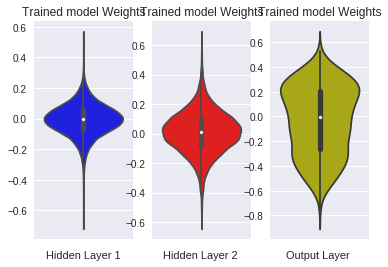

In [0]:
w_after = model.get_weights()

# weights of hidden layer 1
h1_w = w_after[0].flatten().reshape(-1,1)
# weights of hidden layer 2
h2_w = w_after[2].flatten().reshape(-1,1)
# weights of output layer
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained\n")
# Hidden layer 1
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

# Hidden layer 2
plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

# Output layer
plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

#### Observation:-
1. For the hidden layers, I got good gaussian structures and weights are nicely distributed . For output layer it is like combination of 2 gaussian structures .
2. All the weights are centered around 0 and have reasonable variance and all are working well.

## 3.5 Model with dropout and Batch Normalization

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

model_drop = Sequential()

# First hidden layer
model_drop.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
# Adding Batch Normalization
model_drop.add(BatchNormalization())
# Adding Dropout
model_drop.add(Dropout(0.5))

# Second hidden layer
model_drop.add(Dense(52, activation='relu', kernel_initializer=he_normal(seed=None)))
# Adding Batch Normalization
model_drop.add(BatchNormalization())
# Adding Dropout
model_drop.add(Dropout(0.5))

# Output layer
model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 364)               285740    
_________________________________________________________________
batch_normalization_3 (Batch (None, 364)               1456      
_________________________________________________________________
dropout_3 (Dropout)          (None, 364)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 52)                18980     
_________________________________________________________________
batch_normalization_4 (Batch (None, 52)                208       
_________________________________________________________________
dropout_4 (Dropout)          (None, 52)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                530       
Total para

In [0]:
# Compiling the model 
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the model

history = model_drop.fit(X_train, Y_train, batch_size = batch_size, epochs = nb_epoch, verbose=1, validation_data = (X_test, Y_test)) 


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.5380 - acc: 0.8405 - val_loss: 0.1708 - val_acc: 0.9485
Epoch 2/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.2567 - acc: 0.9259 - val_loss: 0.1255 - val_acc: 0.9603
Epoch 3/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.1998 - acc: 0.9431 - val_loss: 0.1044 - val_acc: 0.9678
Epoch 4/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.1731 - acc: 0.9509 - val_loss: 0.0930 - val_acc: 0.9717
Epoch 5/20
60000/60000 [==============================] - 6s 108us/step - loss: 0.1526 - acc: 0.9566 - val_loss: 0.0822 - val_acc: 0.9737
Epoch 6/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.1421 - acc: 0.9596 - val_loss: 0.0838 - val_acc: 0.9728
Epoch 7/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.1304 - acc: 0.9622 - val_loss: 0.0783 - 

### 3.6  Plotting the model values

Test score: 0.06253433417174965
Test accuracy: 0.9818


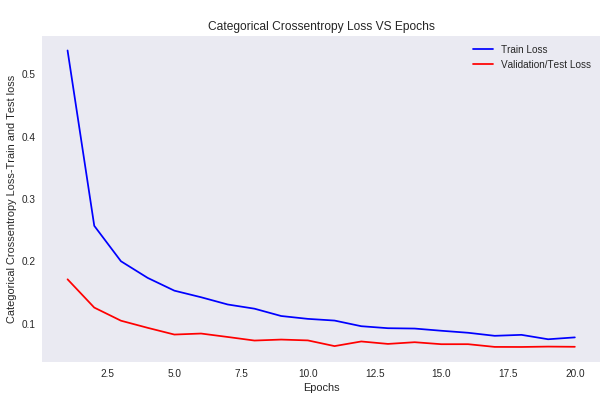

In [0]:
# Evaluating the model on test data
score_drop = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_drop[0]) 
print('Test accuracy:', score_drop[1])

# Plotting the results
# list of epoch numbers
x = list(range(1, nb_epoch+1))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
vy = history.history['val_loss']

# Training loss
ty = history.history['loss']
# calling the dynamic function to draw the plot
plt_dynamic(x, vy, ty)

#### Observation:-
1. After adding dropout, both Train and Test loss are significantly reducing and there is no divergence / increasing between them .

### 3.7  Plotting Violin plots of hidden and output layers to see weights distribution

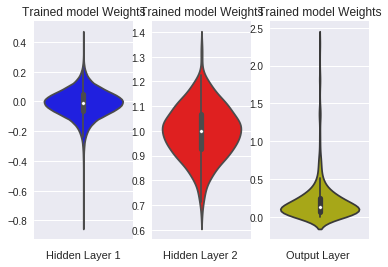

In [0]:
w_after = model_drop.get_weights()

# weights of hidden layer 1
h1_w = w_after[0].flatten().reshape(-1,1)
# weights of hidden layer 2
h2_w = w_after[2].flatten().reshape(-1,1)
# weights of output layer
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained\n")

# Hidden layer 1
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

# Hidden layer 2
plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

# Output layer
plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 4. Softmax Classifier with 3 hidden layers

## 4.1  Model without dropout and Batch Normalization

In [0]:
# start building a model with 3 hidden layers
# Initializing the sequential model as the layers are in sequential 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

model_1 = Sequential()   

# Adding first hidden layer
model_1.add(Dense(420, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))

# Adding second hidden layer
model_1.add(Dense(252, activation='relu', kernel_initializer=he_normal(seed=None)))

# Adding third hidden layer
model_1.add(Dense(45, activation='relu', kernel_initializer=he_normal(seed=None)))

# Adding output layer 
model_1.add(Dense(output_dim, activation='softmax'))

# Printing model summary
model_1.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 420)               329700    
_________________________________________________________________
dense_14 (Dense)             (None, 252)               106092    
_________________________________________________________________
dense_15 (Dense)             (None, 45)                11385     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                460       
Total params: 447,637
Trainable params: 447,637
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compiling the model 
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the model
# To fit the model, give input data, batch_size, number of epochs and validation/test data

history = model_1.fit(X_train, Y_train, batch_size = batch_size, epochs = nb_epoch, verbose=1, validation_data = (X_test, Y_test)) 


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.2451 - acc: 0.9260 - val_loss: 0.1085 - val_acc: 0.9651
Epoch 2/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.0893 - acc: 0.9726 - val_loss: 0.0978 - val_acc: 0.9687
Epoch 3/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0562 - acc: 0.9829 - val_loss: 0.0833 - val_acc: 0.9749
Epoch 4/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0410 - acc: 0.9870 - val_loss: 0.0613 - val_acc: 0.9819
Epoch 5/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.0295 - acc: 0.9902 - val_loss: 0.0670 - val_acc: 0.9798
Epoch 6/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.0254 - acc: 0.9916 - val_loss: 0.0775 - val_acc: 0.9782
Epoch 7/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0219 - acc: 0.9926 - val_loss: 0.0743 - 

### 4.2 Plotting the model values

Test score: 0.10307921019351929
Test accuracy: 0.9807


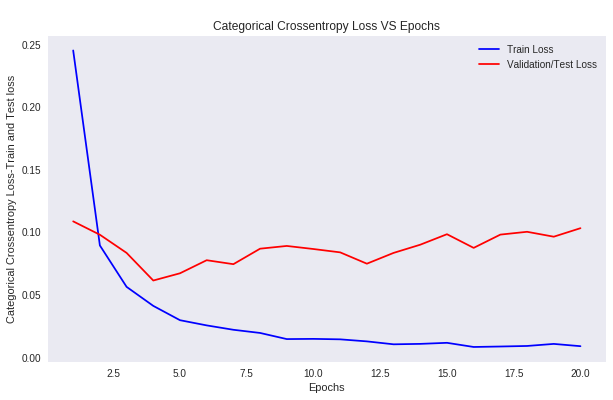

In [0]:
# Evaluating the model on test data
score_1 = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_1[0]) 
print('Test accuracy:', score_1[1])

# Plotting the results
# list of epoch numbers
x = list(range(1, nb_epoch+1))

# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# we will get val_loss and val_acc only when you pass the paramter validation_data
# for each key in histrory.histrory we will have a list of length equal to number of epochs. History records training metrics for each epoch. 
# This includes the loss and the accuracy as well as the loss and accuracy for the validation dataset, if one is set.
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

# val_loss : validation loss
vy = history.history['val_loss']
# Training loss
ty = history.history['loss']

# calling the dynamic function to draw the plot
plt_dynamic(x, vy, ty)

#### Observations:-

1. In this plot, as we are running more epochs the train and test loss are reducing , but test loss started increasing after epoch 6 and train loss/error is reducing further. This leads to model overfitting
2. Actually test loss should decrease, but in above plot its increasing and both train and test loss are diverging which leads to overfitting of model.
3. To avoid this, we can add regularizations like dropouts.


### 4.3 Plotting Violin plots of hidden and output layers to see weights distribution

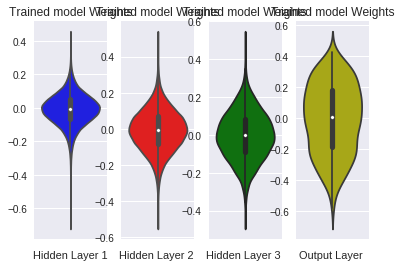

In [0]:
w_after = model_1.get_weights()

# 3 hidden layers and output layer
h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained\n")

# For hidden layer 1
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

# For hidden layer 2
plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

#For hidden layer 3
plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')


plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 4.4 Model with dropout and Batch Normalization

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

model_1_drop = Sequential()

# First hidden layer
model_1_drop.add(Dense(420, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
# Adding Batch Normalization
model_1_drop.add(BatchNormalization())
# Adding Dropout
model_1_drop.add(Dropout(0.5))

# Second hidden layer
model_1_drop.add(Dense(252, activation='relu', kernel_initializer=he_normal(seed=None)))
# Adding Batch Normalization
model_1_drop.add(BatchNormalization())
# Adding Dropout
model_1_drop.add(Dropout(0.5))

# Third hidden layer
model_1_drop.add(Dense(45, activation='relu', kernel_initializer=he_normal(seed=None)))
# Adding Batch Normalization
model_1_drop.add(BatchNormalization())
# Adding Dropout
model_1_drop.add(Dropout(0.5))

# Output layer
model_1_drop.add(Dense(output_dim, activation='softmax'))


model_1_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 420)               329700    
_________________________________________________________________
batch_normalization_5 (Batch (None, 420)               1680      
_________________________________________________________________
dropout_5 (Dropout)          (None, 420)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 252)               106092    
_________________________________________________________________
batch_normalization_6 (Batch (None, 252)               1008      
_________________________________________________________________
dropout_6 (Dropout)          (None, 252)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 45)                11385     
__________

In [0]:
# Compiling the model 
model_1_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the model

history = model_1_drop.fit(X_train, Y_train, batch_size = batch_size, epochs = nb_epoch, verbose=1, validation_data = (X_test, Y_test)) 


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 181us/step - loss: 0.6888 - acc: 0.7916 - val_loss: 0.1892 - val_acc: 0.9412
Epoch 2/20
60000/60000 [==============================] - 10s 160us/step - loss: 0.2975 - acc: 0.9179 - val_loss: 0.1274 - val_acc: 0.9596
Epoch 3/20
60000/60000 [==============================] - 9s 158us/step - loss: 0.2302 - acc: 0.9372 - val_loss: 0.1156 - val_acc: 0.9645
Epoch 4/20
60000/60000 [==============================] - 9s 158us/step - loss: 0.1955 - acc: 0.9456 - val_loss: 0.0927 - val_acc: 0.9728
Epoch 5/20
60000/60000 [==============================] - 9s 157us/step - loss: 0.1660 - acc: 0.9546 - val_loss: 0.0977 - val_acc: 0.9714
Epoch 6/20
60000/60000 [==============================] - 10s 158us/step - loss: 0.1559 - acc: 0.9566 - val_loss: 0.0861 - val_acc: 0.9738
Epoch 7/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.1418 - acc: 0.9600 - val_loss: 0.080

### 4.5  Plotting the model values

Test score: 0.0603378255185904
Test accuracy: 0.9834


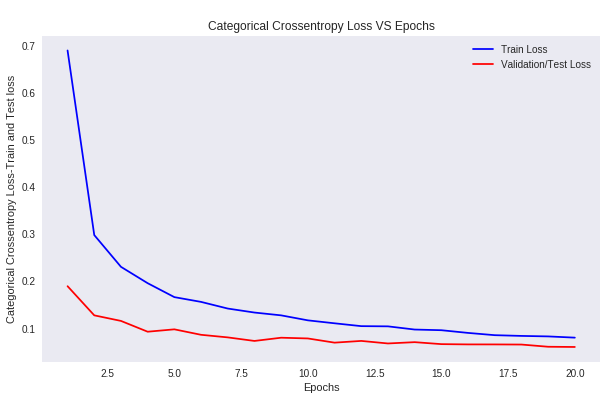

In [0]:
# Evaluating the model on test data
score_1_drop = model_1_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_1_drop[0]) 
print('Test accuracy:', score_1_drop[1])

# Plotting the results
# list of epoch numbers
x = list(range(1, nb_epoch+1))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
vy = history.history['val_loss']

# Training loss
ty = history.history['loss']
# calling the dynamic function to draw the plot
plt_dynamic(x, vy, ty)

#### Observation:-

After adding dropout, both Train and Test loss are significantly reducing /converging and there is no divergence / increasing between them .


### 4.6 Plotting Violin plots of hidden and output layers to see weights distribution


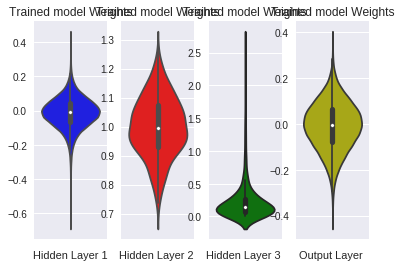

In [0]:
w_after = model_1_drop.get_weights()

# weights of hidden layer 1
h1_w = w_after[0].flatten().reshape(-1,1)
# weights of hidden layer 2
h2_w = w_after[2].flatten().reshape(-1,1)
# weights of hidden layer 3
h3_w = w_after[4].flatten().reshape(-1,1)
# weights of output layer
out_w = w_after[6].flatten().reshape(-1,1)

# Plotting the violin plots
fig = plt.figure()
plt.title("Weight matrices after model trained\n")

# Hidden layer 1
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

# Hidden layer 2
plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

# Hidden layer 3
plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')


# Output layer
plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 5. Softmax Classifier with 5 hidden layers

## 5.1  Model without dropout and Batch Normalization

In [0]:
# start building a model with 5 hidden layers
# Initializing the sequential model as the layers are in sequential 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

model_2 = Sequential()   

# Adding first hidden layer
model_2.add(Dense(532, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))

# Adding second hidden layer
model_2.add(Dense(354, activation='relu', kernel_initializer=he_normal(seed=None)))

# Adding third hidden layer
model_2.add(Dense(165, activation='relu', kernel_initializer=he_normal(seed=None)))

# Adding fourth hidden layer
model_2.add(Dense(83, activation='relu', kernel_initializer=he_normal(seed=None)))

# Adding fifth hidden layer
model_2.add(Dense(34, activation='relu', kernel_initializer=he_normal(seed=None)))

# Adding output layer 
model_2.add(Dense(output_dim, activation='softmax'))

# Printing model summary
model_2.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 532)               417620    
_________________________________________________________________
dense_22 (Dense)             (None, 354)               188682    
_________________________________________________________________
dense_23 (Dense)             (None, 165)               58575     
_________________________________________________________________
dense_24 (Dense)             (None, 83)                13778     
_________________________________________________________________
dense_25 (Dense)             (None, 34)                2856      
_________________________________________________________________
dense_26 (Dense)             (None, 10)                350       
Total params: 681,861
Trainable params: 681,861
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compiling the model 
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the model
# To fit the model, give input data, batch_size, number of epochs and validation/test data

history = model_2.fit(X_train, Y_train, batch_size = batch_size, epochs = nb_epoch, verbose=1, validation_data = (X_test, Y_test)) 


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 192us/step - loss: 0.2578 - acc: 0.9197 - val_loss: 0.1270 - val_acc: 0.9578
Epoch 2/20
60000/60000 [==============================] - 10s 170us/step - loss: 0.0911 - acc: 0.9718 - val_loss: 0.0933 - val_acc: 0.9718
Epoch 3/20
60000/60000 [==============================] - 10s 173us/step - loss: 0.0614 - acc: 0.9804 - val_loss: 0.0871 - val_acc: 0.9730
Epoch 4/20
60000/60000 [==============================] - 10s 171us/step - loss: 0.0464 - acc: 0.9846 - val_loss: 0.0854 - val_acc: 0.9757
Epoch 5/20
60000/60000 [==============================] - 10s 171us/step - loss: 0.0380 - acc: 0.9879 - val_loss: 0.0770 - val_acc: 0.9785
Epoch 6/20
60000/60000 [==============================] - 10s 171us/step - loss: 0.0292 - acc: 0.9905 - val_loss: 0.0789 - val_acc: 0.9766
Epoch 7/20
60000/60000 [==============================] - 10s 172us/step - loss: 0.0293 - acc: 0.9906 - val_loss: 0.

### 5.2 Plotting the model values

Test score: 0.08769175834859744
Test accuracy: 0.9824


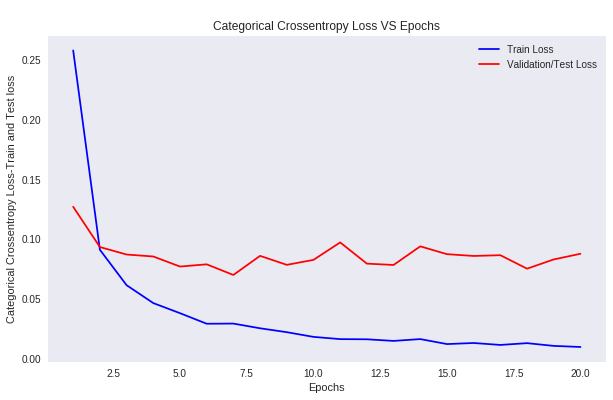

In [0]:
# Evaluating the model on test data
score_2 = model_2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_2[0]) 
print('Test accuracy:', score_2[1])

# Plotting the results
# list of epoch numbers
x = list(range(1, nb_epoch+1))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
vy = history.history['val_loss']

# Training loss
ty = history.history['loss']
# calling the dynamic function to draw the plot
plt_dynamic(x, vy, ty)

### 5.3  Plotting Violin plots of hidden and output layers to see weights distribution

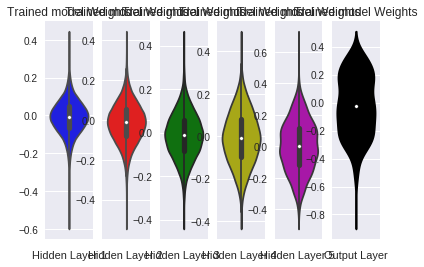

In [0]:
w_after = model_2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)

out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained\n")

# Hidden Layer 1
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

# Hidden Layer 2
plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

# Hidden Layer 3
plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

# Hidden Layer 4
plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='y')
plt.xlabel('Hidden Layer 4 ')

# Hidden Layer 5
plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='m')
plt.xlabel('Hidden Layer 5 ')

# Output layer
plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='k')
plt.xlabel('Output Layer')
plt.show()

## 5.4 Model with dropout and Batch Normalization

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

model_2_drop = Sequential()

# First hidden layer
model_2_drop.add(Dense(532, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
# Adding Batch Normalization
model_2_drop.add(BatchNormalization())
# Adding Dropout
model_2_drop.add(Dropout(0.5))

# Second hidden layer
model_2_drop.add(Dense(354, activation='relu', kernel_initializer=he_normal(seed=None)))
# Adding Batch Normalization
model_2_drop.add(BatchNormalization())
# Adding Dropout
model_2_drop.add(Dropout(0.5))

# Third hidden layer
model_2_drop.add(Dense(165, activation='relu', kernel_initializer=he_normal(seed=None)))
# Adding Batch Normalization
model_2_drop.add(BatchNormalization())
# Adding Dropout
model_2_drop.add(Dropout(0.5))

# Fouth hidden layer
model_2_drop.add(Dense(83, activation='relu', kernel_initializer=he_normal(seed=None)))
# Adding Batch Normalization
model_2_drop.add(BatchNormalization())
# Adding Dropout
model_2_drop.add(Dropout(0.5))

# Fifth hidden layer
model_2_drop.add(Dense(34, activation='relu', kernel_initializer=he_normal(seed=None)))
# Adding Batch Normalization
model_2_drop.add(BatchNormalization())
# Adding Dropout
model_2_drop.add(Dropout(0.5))

# Output layer
model_2_drop.add(Dense(output_dim, activation='softmax'))


model_2_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 532)               417620    
_________________________________________________________________
batch_normalization_8 (Batch (None, 532)               2128      
_________________________________________________________________
dropout_8 (Dropout)          (None, 532)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 354)               188682    
_________________________________________________________________
batch_normalization_9 (Batch (None, 354)               1416      
_________________________________________________________________
dropout_9 (Dropout)          (None, 354)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 165)               58575     
__________

In [0]:
# Compiling the model 
model_2_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the model

history = model_2_drop.fit(X_train, Y_train, batch_size = batch_size, epochs = nb_epoch, verbose=1, validation_data = (X_test, Y_test)) 


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 17s 276us/step - loss: 1.3228 - acc: 0.5787 - val_loss: 0.2892 - val_acc: 0.9192
Epoch 2/20
60000/60000 [==============================] - 14s 237us/step - loss: 0.5058 - acc: 0.8595 - val_loss: 0.1904 - val_acc: 0.9490
Epoch 3/20
60000/60000 [==============================] - 14s 237us/step - loss: 0.3545 - acc: 0.9100 - val_loss: 0.1504 - val_acc: 0.9596
Epoch 4/20
60000/60000 [==============================] - 14s 235us/step - loss: 0.2935 - acc: 0.9292 - val_loss: 0.1263 - val_acc: 0.9661
Epoch 5/20
60000/60000 [==============================] - 14s 235us/step - loss: 0.2576 - acc: 0.9379 - val_loss: 0.1281 - val_acc: 0.9682
Epoch 6/20
60000/60000 [==============================] - 14s 234us/step - loss: 0.2308 - acc: 0.9458 - val_loss: 0.1127 - val_acc: 0.9721
Epoch 7/20
60000/60000 [==============================] - 14s 236us/step - loss: 0.2067 - acc: 0.9514 - val_loss: 0.

###  5.5 Plotting the model values

Test score: 0.07762294698476326
Test accuracy: 0.9815


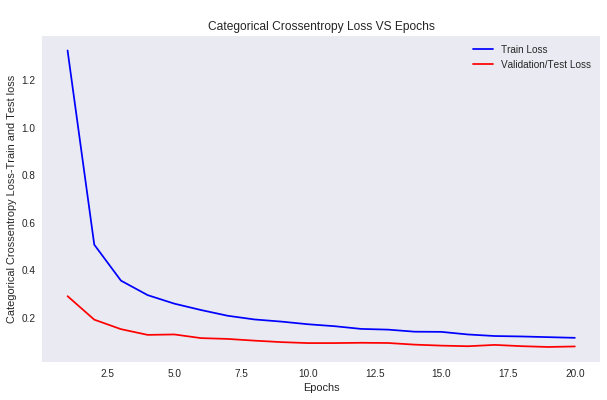

In [0]:
# Evaluating the model on test data
score_2_drop = model_2_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_2_drop[0]) 
print('Test accuracy:', score_2_drop[1])

# Plotting the results
# list of epoch numbers
x = list(range(1, nb_epoch+1))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
vy = history.history['val_loss']

# Training loss
ty = history.history['loss']
# calling the dynamic function to draw the plot
plt_dynamic(x, vy, ty)

### 5.6 Plotting Violin plots of hidden and output layers to see weights distribution

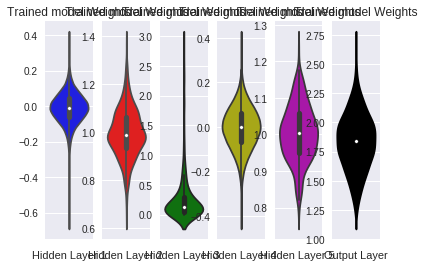

In [0]:
w_after = model_2_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)

out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained\n")

# Hidden Layer 1
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

# Hidden Layer 2
plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

# Hidden Layer 3
plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

# Hidden Layer 4
plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='y')
plt.xlabel('Hidden Layer 4 ')

# Hidden Layer 5
plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='m')
plt.xlabel('Hidden Layer 5 ')

# Output layer
plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='k')
plt.xlabel('Output Layer')
plt.show()

# 6. Models Summarization

In [0]:
from pandas import DataFrame
MLP = {'MLP Layers':['2-hidden layer','2-hidden layer','3-hidden layer','3-hidden layer','5-hidden layer','5-hidden layer'],
             'Model':['Model without dropout and Batch Normalization','Model with dropout and Batch Normalization','Model without dropout and Batch Normalization',
             'Model with dropout and Batch Normalization','Model without dropout and Batch Normalization','Model with dropout and Batch Normalization'],
             'Activation':['ReLU','ReLU','ReLU','ReLU','ReLU','ReLU'],'Optimizer':['Adam','Adam','Adam','Adam','Adam','Adam'],
             'Kernel_initializer':['he_normal','he_normal','he_normal','he_normal','he_normal','he_normal'],
             'output layer':['softmax','softmax','softmax','softmax','softmax','softmax'],
             'Training accuracy':['0.99','0.97','0.99','0.97','0.99','0.97'],
             'Train loss':['0.008','0.07','0.008','0.08','0.009','0.11'],
             'Test accuracy':['0.98','0.98','0.98','0.98','0.98','0.98'], 
             'Test loss':['0.091','0.06','0.10','0.06','0.08','0.07']}

In [0]:
Final_conclusions = DataFrame(MLP)
Final_conclusions

,Activation,Kernel_initializer,MLP Layers,Model,Optimizer,Test accuracy,Test loss,Train loss,Training accuracy,output layer
0,ReLU,he_normal,2-hidden layer,Model without dropout and Batch Normalization,Adam,0.98,0.091,0.008,0.99,softmax
1,ReLU,he_normal,2-hidden layer,Model with dropout and Batch Normalization,Adam,0.98,0.06,0.07,0.97,softmax
2,ReLU,he_normal,3-hidden layer,Model without dropout and Batch Normalization,Adam,0.98,0.10,0.008,0.99,softmax
3,ReLU,he_normal,3-hidden layer,Model with dropout and Batch Normalization,Adam,0.98,0.06,0.08,0.97,softmax
4,ReLU,he_normal,5-hidden layer,Model without dropout and Batch Normalization,Adam,0.98,0.08,0.009,0.99,softmax
5,ReLU,he_normal,5-hidden layer,Model with dropout and Batch Normalization,Adam,0.98,0.07,0.11,0.97,softmax


# 7. Conclusions:-

From the above observations  I can observed,  
1. As I had used ReLU activation and Adam optimizer, all the accuracies are good.
2. Output layer is softmax layer
3. Models without dropout and normalization have less Test accuracy, and after adding dropout and normalization, model Test/validation accuracy improved, but there is no much difference in values.
4. With the add of dropout and normalization, the test loss also decreased.
5. In the Categorical Crossentropy Loss VS Epochs plot,  train and test loss also converged or decreased gradually after adding dropout and normalization.
6. So by adding dropout and normalization,  model worked well and gave good results.
7. I have used he_normal as kernel initializer as it have inbuilt mean and std values, without need of defing them explicitly. 